## Exercise 1.3

1. **Illustrate the phenomenon of weak convergence stated in Fisher and Tipett’s theorem
 through the convergence of histograms (built from a random sample) of maxima towards
 histograms of the limit, for a negative shape parameter.**

- **Choose a textbook distribution $F$ in the Gumbell domain of attraction and find appropriate norming
sequences $a_n,b_n$ such that (MDA) holds.**

The exponential cdf $F_\lambda(x) = 1 - e^{-\lambda x}$ with $\lambda>0$ is in the Gumbell domain of attraction. Indeed, by choosing $a_n = 1/\lambda$, and $b_n=\log(n)/\lambda$ for all $n\in\mathbb{N}$, we find that asymptotically: $$F^n_\lambda(a_nx+b_n)\xrightarrow[n\rightarrow \infty]{} G(x) := G_{0,0,0}(x) = e^{-e^{-x}}.$$

- **Generate $M$ blocks of size $n$ of independent random variables distributed according to $F$ and normalize the block maxima**

In [19]:
import numpy as np
import matplotlib.pyplot as plt

M, n = 10000, 10000

np.random.seed(42)
# Generate M*n samples of an exponential law
exp_rand = np.random.exponential(scale=1.0, size=(M, n))
block_maxima_exp = exp_rand.max(axis=1)

In order to normalize the block minima we have to use the aforementionned $(a_n)_{n\in\mathbb{N}}$ and $(b_n)_{n\in\mathbb{N}}$ sequences, indeed the normalized maxima are given by $x = \frac{y - b_n}{a_n}$. Furthermore, because the exponential distribution factor $\lambda$ is mitigated by the EVD, we have chosen $\lambda=1$.

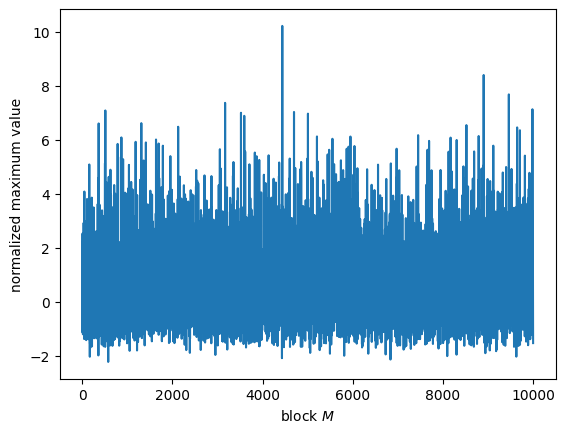

In [38]:
block_maxima_normalized_exp = (block_maxima_exp - np.log(n))

plt.plot(block_maxima_normalized_exp)
plt.ylabel("normalized maximum value")
plt.xlabel("block $M$")
plt.show()

- **Plot a histogram of the $M$ normalized maxima and superimpose the histogram for the limit distribution in a visually illustrative manner.**

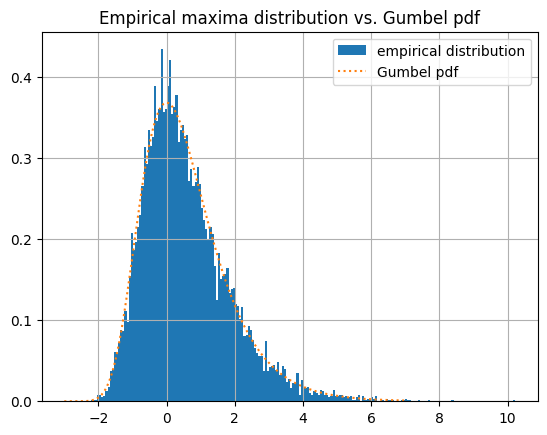

In [25]:
_, ax = plt.subplots()

ax.hist(block_maxima_normalized_exp, bins=200, density=True, label="empirical distribution")
ax.plot(
    np.arange(-3, 7, 0.01),
    np.exp(-np.exp(-np.arange(-3, 7, 0.01))) * np.exp(-np.arange(-3, 7, 0.01)),
    linestyle=":",
    label="Gumbel pdf",
)
plt.legend()
plt.title("Empirical maxima distribution vs. Gumbel pdf")
plt.grid()
plt.show()

- **Let M and n vary so as to illustrate weak convergence of block-maxima as n → ∞.
Explain the respective role of M and n in what you observe. Summarize the results
in a figure including ≈ 6 such histograms with different values of n and a single
(appropriate) value of M.**

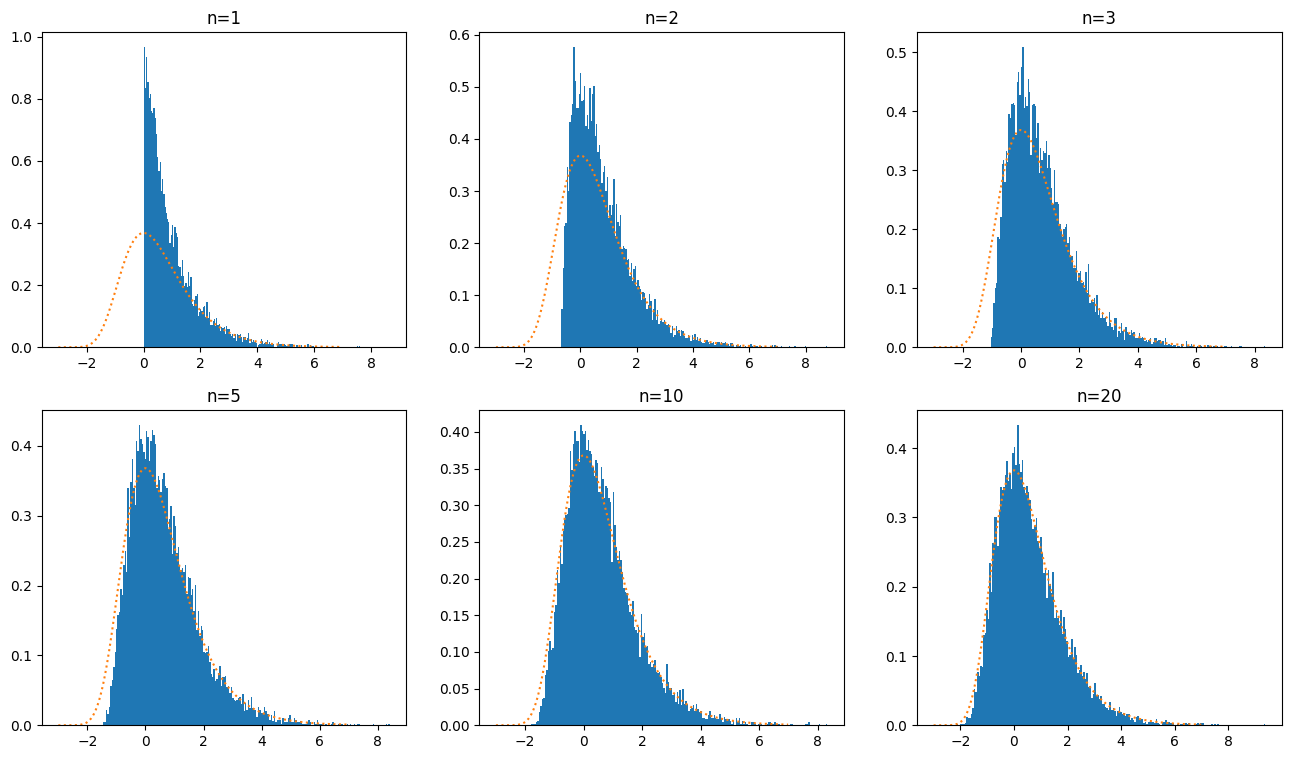

In [29]:
n_values = [1, 2, 3, 5, 10, 20]

_, axs = plt.subplots(2, 3, figsize=(16,9))
# We avoid regenerating the same values several times, we just generate it one time and see as 
# we include more values, whether the estimation fits better the theoretical pdf
exp_rand_t = np.random.exponential(scale=1.0, size=(10000, n_values[-1]))
for i, ni in enumerate(n_values):
    exp_rand = exp_rand_t[:, :ni]
    block_maxima = exp_rand.max(axis=1)
    block_maxima_normalized = (block_maxima - np.log(ni))
    axs[i//3, i%3].hist(block_maxima_normalized, bins=200, density=True, label="empirical distribution")
    axs[i//3, i%3].plot(
        np.arange(-3, 7, 0.01),
        np.exp(-np.exp(-np.arange(-3, 7, 0.01))) * np.exp(-np.arange(-3, 7, 0.01)),
        linestyle=":",
        label="Gumbel pdf",
    )
    axs[i//3, i%3].set_title(f"n={ni}") 
plt.show()

For $n>10$, the results are satisfying because the theoretical pdf of the Gumbel distribution matches the empirical pdf, the convergence is thus quite fast.

For $M$ it yields the following results:

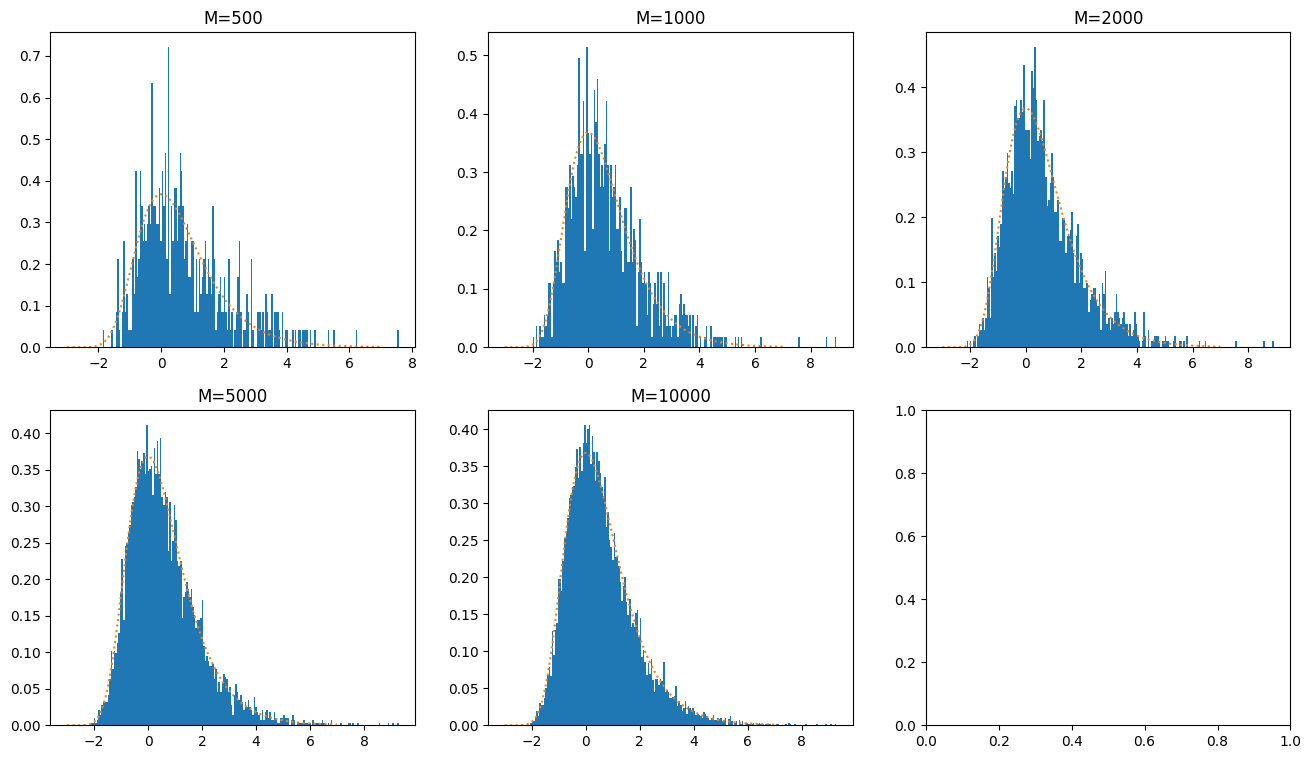

In [28]:
M_values = [500, 1000, 2000, 5000, 10000]

_, axs = plt.subplots(2, 3, figsize=(16,9))
# We avoid regenerating the same values several times, we just generate it one time and see as 
# we include more values, whether the estimation fits better the theoretical pdf
exp_rand_t = np.random.exponential(scale=1.0, size=(M_values[-1], 50))
for i, Mi in enumerate(M_values):
    exp_rand = exp_rand_t[:Mi, :]
    block_maxima = exp_rand.max(axis=1)
    block_maxima_normalized = (block_maxima - np.log(50))
    axs[i//3, i%3].hist(block_maxima_normalized, bins=200, density=True, label="empirical distribution")
    axs[i//3, i%3].plot(
        np.arange(-3, 7, 0.01),
        np.exp(-np.exp(-np.arange(-3, 7, 0.01))) * np.exp(-np.arange(-3, 7, 0.01)),
        linestyle=":",
        label="Gumbel pdf",
    )
    axs[i//3, i%3].set_title(f"M={Mi}") 
plt.show()

For $M>2000$, the empirical and theoretical pdfs match pretty clearly.

- **Show (graphically and numerically) uniform convergence of c.d.f.’s.**

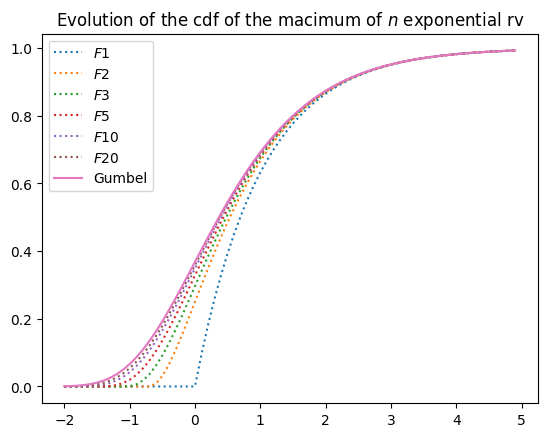

In [8]:
_, ax = plt.subplots()
for n in n_values:
    cdf_range = np.arange(-2, 5, 0.1) + np.log(n)
    ax.plot(np.arange(-2, 5, 0.1), (cdf_range >= 0) * (1 - np.exp(-cdf_range))**n, linestyle= ":", label=f"$F{n}$")
ax.plot(np.arange(-2, 5, 0.1), np.exp(-np.exp(-np.arange(-2, 5, 0.1))), label="Gumbel")
ax.legend()
ax.set_title("Evolution of the cdf of the macimum of $n$ exponential rv")
plt.show()

Knowing that $F_n(x) = \chi_{[x + \log(n)\geq 0]}\exp\left(\log\left(1 - \frac{\exp(-x)}{n}\right)n\right)$ for all $n\in\mathbb{N}^*$, where $\chi_{C}(x)=1$ if $x\in C$ and $\chi_{C}(x)=0$  otherwise.

- For $x<-\log(n)$:

 $|F_n(x) - G(x)| = |G(x)|< G(-\log(n)) = e^{-\frac{1}{n}}$, (G is an increasing function).

- For $x\geq-\log(n)$:

$|F_n - G|$ is a decreasing function, we can show this by showing that $G^\prime - F^\prime<0$, thus $|F_n(x) - G(x)| < G(-\log(n)) = e^{-\frac{1}{n}}$

So,  $\|F_n - G\|_\infty = \sup\limits_{x\in\mathbb{R}} | F_n(x) - G(x)|$ tends to 0 when $n$ tends to $+\infty$, and we have uniform convergence of the sequence.

- **Explain why (i.e. prove
 that) weak convergence of normalized maxima indeed implies uniform convergence of c.d.f’s**

We define the empirical cdf of the normalized block maxima $(M_n(i))_{1\leq i\leq M}$ as $\hat F_{n,M}(x) = \frac{1}{M}\sum\limits_{i=1}^M \chi_{(-\infty, x]}(M_n(i))$. 
We know that $M_n(i)\sim G_{0,0,1} $, thus $\hat F_{n,M}\xrightarrow[M\rightarrow\infty]{w} G$. Furthermore, for each $M\in\mathbb{N}^*$, there exists $y_M\in\mathbb{R}$ such that $\forall x \geq y_M,\ \hat F_{n,M}(x) = 1$. The sequence $(y_M)_{M\in\mathbb{N}^*}$ is increasing over $\mathbb{R}$ and tends to $+\infty$.

A simple proof of this result can be done by contradiction: assuming that $\overline y = \limsup\limits_{M\rightarrow \infty} y_M$ is finite, for any point $x$ greater that $\overline y$, the empirical cdf would be equal to 1 for all $M$, but $G(x)< 1$, contradicting the weak convergence.

Let $\varepsilon> 0$.
Given that $G(x)\xrightarrow[x\rightarrow\infty]{}1$, we can find $a\in\mathbb{R}$, such that $\forall x> a,\ 1 - G(x) <\varepsilon$. Knowing the sequence $(y_M)_{M\in\mathbb{N}^*}$, we can find $M^\prime$ such that $y_{M^\prime}> a$.


Meanwhile, $\sup\limits_{x\in\mathbb{R}} |\hat F_{n,M}(x) - G(x)|\leq \sup\limits_{x\in(-\infty, -\log(n)]} | \hat F_{n,M}(x) - G(x)| + \sup\limits_{x\in[-\log(n), y_{M^\prime}]} | \hat F_{n,M}(x) - G(x)| + \sup\limits_{x\in[y_{M^\prime}, +\infty)} | \hat F_{n,M}(x) - G(x)| \leq e^{-\frac{1}{n}} +  \sup\limits_{x\in[-\log(n), y_{M^\prime}]} | \hat F_{n,M}(x) - G(x)| + \varepsilon$.

Since $G$ is uniformly continuous over $[-\log(n), y_{M^\prime}]$, and $(F_{n,M}(x))_{M\in\mathbb{N}^*}$, $G$ are monotonous functions, we can apply the local uniform convergence of monotone functions lemma over the interval, the quantity converges when $M$ tends to $\infty$.

 Finally, $\sup\limits_{x\in\mathbb{R}} |\hat F_{n,M}(x) - G(x)|\xrightarrow[M, n\rightarrow\infty]{}0 $.

3. **Change the input distribution and work with a translated Pareto distribution**

We use the fact that a Pareto law is in the Fréchet domain of attraction with $(a_n)_{n\in\mathbb{N}}=n^\frac{1}{\alpha}$ and $(b_n)_{n\in\mathbb{N}}=0$ and $G(x) = e^{-x^{-\alpha}}$.

In [30]:
from scipy.stats import pareto, genextreme

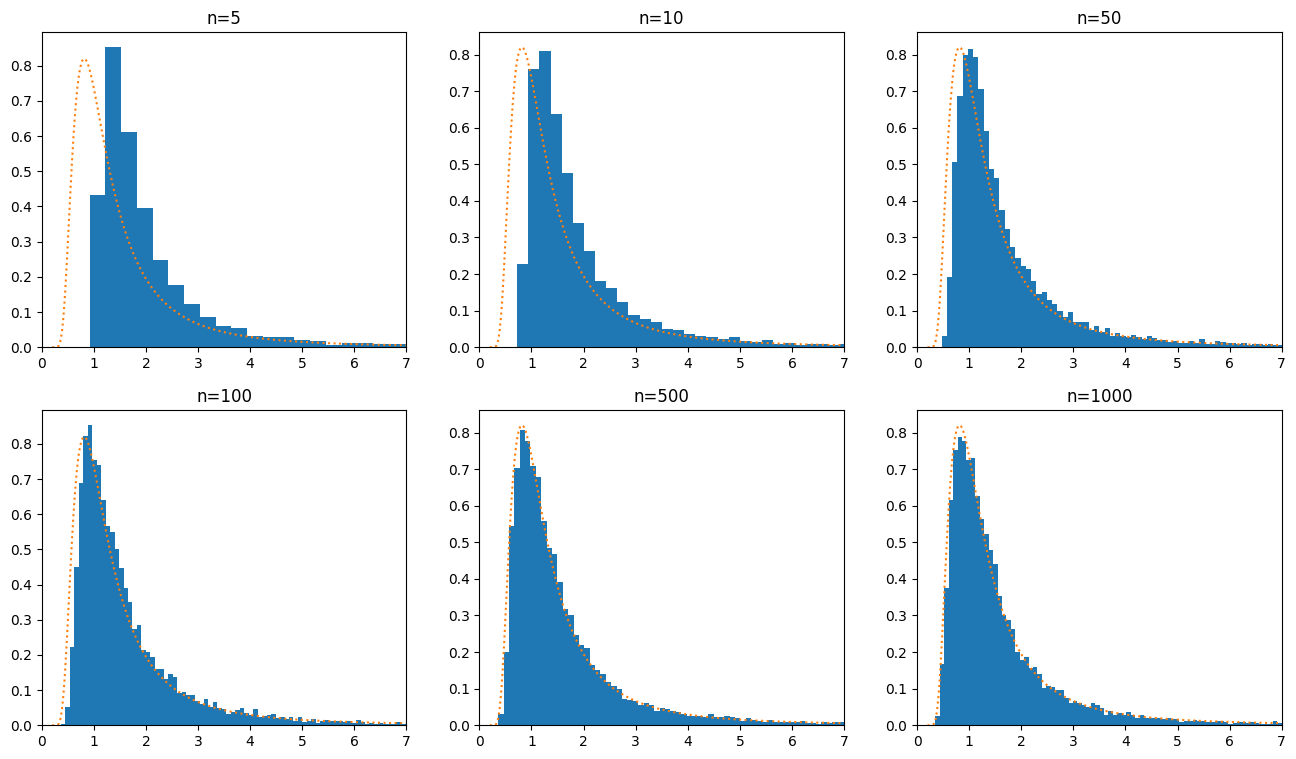

In [31]:
n_values = [5, 10, 50, 100, 500, 1000]
alpha = 2
_, axs = plt.subplots(2, 3, figsize=(16, 9))
# We avoid regenerating the same values several times, we just generate it one time and see as 
# we include more values, whether the estimation fits better the theoretical pdf
pareto_rand_total = pareto.rvs(alpha, loc=1, scale=1, size=(10000, n_values[-1]), random_state=0)
for i, ni in enumerate(n_values):
    pareto_rand = pareto_rand_total[:, :ni]
    block_maxima_par = pareto_rand.max(axis=1)
    block_maxima_normalized = (block_maxima_par) / (ni ** (1 / alpha))
    axs[i // 3, i % 3].hist(
        block_maxima_normalized, bins=1000, density=True, label="empirical distribution"
    )
    axs[i // 3, i % 3].plot(
        np.arange(0.2, 7, 0.01),
        alpha
        * np.arange(0.2, 7, 0.01) ** (-alpha - 1)
        * np.exp(-np.arange(0.2, 7, 0.01) ** -alpha),
        linestyle=":",
        label="Gumbel pdf",
    )
    axs[i // 3, i % 3].set_xlim([0, 7])
    axs[i // 3, i % 3].set_title(f"n={ni}")
plt.show()

- **With the distribution from question 3, generate a dataset of an appropriate size and estimate
the GEV parameters with a maximum-likelihood method. Discuss the convergence towards
the true parameters**

In [45]:
ksi, mu, sigma = - 1/alpha, 0, 1

In [50]:
ksi_fit, sigma_fit, mu_fit = genextreme.fit(
    block_maxima_par / (n_values[-1] ** (1 / alpha)), loc=0, scale=1
)

In [51]:
import pandas as pd

pd.DataFrame({"ksi": [ksi, ksi_fit], "mu": [mu, mu_fit], "sigma": [sigma, sigma_fit]}, index=["Theoretical", "Fitted"])

,ksi,mu,sigma
Theoretical,-0.50000,0.000000,1.000000
Fitted,-0.50248,0.504467,1.037772
